In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
! {sys.executable} -m pip install openpyxl
import warnings
warnings.filterwarnings('ignore')

In [10]:
schools_df = pd.read_excel('final_spreadsheet.xlsx')

In [12]:
schools_df

,school_number,school_name,wida_pct_exit,wida_pct_met_growth_standard,wida_literacy_avg,wida_comp_avg,tvaas_overall_comp,tvaas_lit_comp,tvaas_num_comp,tvaas_litandnum_comp,...,schbrd_dist,schbrd_mbr,long,lat,cluster_name,within_1mile_library,within_1mile_park,within_1mile_bus,resource_score,high_poverty
0,1,A. Z. Kelley Elementary,NaN,42.3,2.6,2.8,5.0,5.0,5.0,5.0,...,6,Cheryl Mayes,-86.659652,36.021787,Cane Ridge,no,no,no,0,no
1,5,Alex Green Elementary,7.1,42.6,2.8,2.9,3.0,3.0,4.0,3.0,...,1,Robert Taylor,-86.818161,36.276610,Whites Creek,no,no,no,0,yes
2,10,Amqui Elementary,8.2,52.4,2.7,2.8,4.0,5.0,3.0,5.0,...,3,Zach Young,-86.703837,36.273773,Hunters Lane,no,yes,yes,2,no
3,15,Andrew Jackson Elementary,NaN,50.0,2.8,3.1,3.0,1.0,5.0,3.0,...,4,Berthena Nabaa-Mckinney,-86.623780,36.231592,McGavock,no,no,no,0,no
4,45,Bellshire Elementary,NaN,42.5,2.4,2.6,3.0,3.0,3.0,3.0,...,1,Robert Taylor,-86.762129,36.269911,Hunters Lane,no,yes,yes,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,470,McGavock High,NaN,15.9,2.7,2.7,1.0,3.0,1.0,1.0,...,4,Berthena Nabaa-Mckinney,-86.677854,36.185450,McGavock,no,yes,yes,2,no
114,512,Nashville School Of The Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,Tekendrea Fayne,-86.738731,36.132342,Glencliff,no,no,yes,1,no
115,555,Pearl-Cohn High,14.8,23.8,3.0,2.9,1.0,4.0,1.0,1.0,...,5,Tekendrea Fayne,-86.815458,36.164416,Pearl-Cohn,yes,yes,yes,3,yes
116,620,Stratford STEM Magnet School,8.1,29.4,2.8,2.7,1.0,1.0,4.0,3.0,...,3,Zach Young,-86.718072,36.197597,Stratford,no,yes,yes,2,yes


## Visuals for Letter Grades

In [14]:
letter_grade_counts = schools_df[['school_name', 'letter_grade']]

In [17]:
grade_counts = letter_grade_counts['letter_grade'].value_counts().sort_index()

In [19]:
grade_counts_df = grade_counts.reset_index()

In [21]:
grade_counts_df.columns = ['letter_grade', 'total_schools']

In [23]:
grade_counts_df

,letter_grade,total_schools
0,A,20
1,B,7
2,C,14
3,D,32
4,F,44


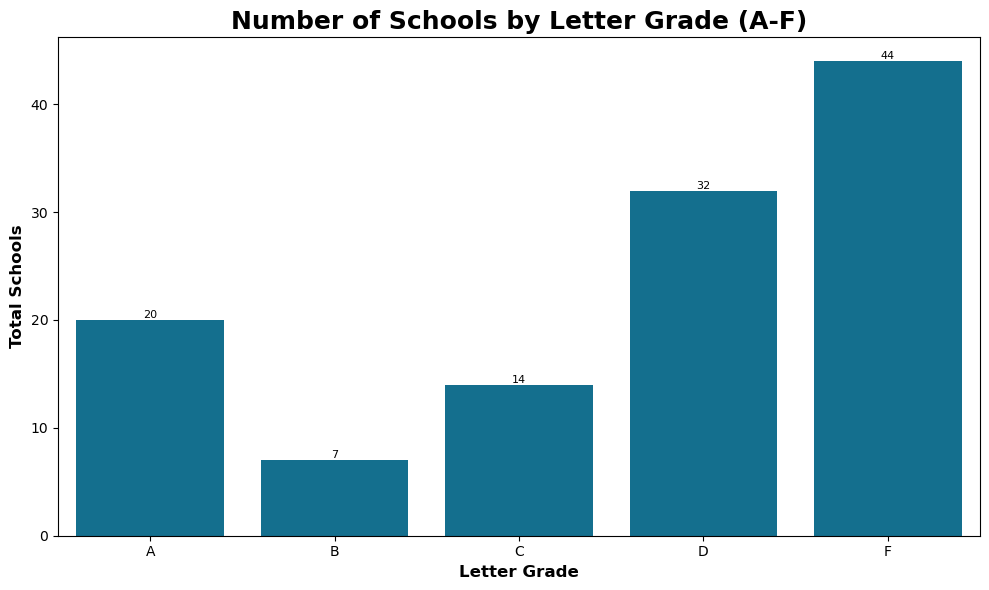

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grade_counts_df, x='letter_grade', y='total_schools', color='#0079a2')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=8,
        color='black'
    )

sns.barplot(
    data=grade_counts_df,
    x='letter_grade',
    y='total_schools',
    color='#0079a2'
)

# Titles and labels
plt.title('Number of Schools by Letter Grade (A-F)', fontsize=18, fontweight='bold', color='black')
plt.ylabel('Total Schools', fontsize=12, fontweight='bold', color='black')
plt.xlabel('Letter Grade', fontsize=12, fontweight='bold', color='black')

# Rotate x-axis labels if needed
#plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## by school type (Elem., MS, HS)

In [36]:
pivot_grade_byschooltype = schools_df.pivot_table(index='letter_grade', columns='school_type', aggfunc='size', fill_value=0)

print(pivot_grade_byschooltype)

school_type   elementary  hs  middle
letter_grade                        
A                     12   4       4
B                      6   0       1
C                      9   2       3
D                     22   3       7
F                     21   9      14


In [42]:
col_order = ['elementary', 'middle', 'hs']

pivot_grade_byschooltype = pivot_grade_byschooltype[col_order]

print(pivot_grade_byschooltype)

school_type   elementary  middle  hs
letter_grade                        
A                     12       4   4
B                      6       1   0
C                      9       3   2
D                     22       7   3
F                     21      14   9


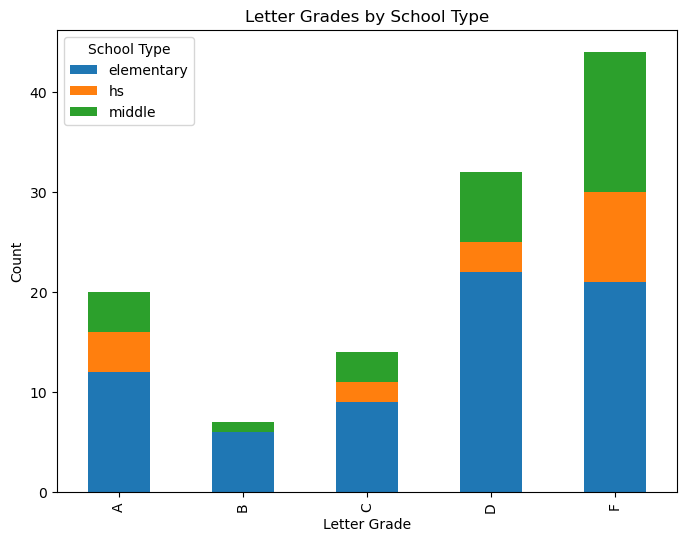

In [40]:
ax = pivot_grade_byschooltype.plot(kind='bar', stacked=True, figsize=(8,6))

plt.xlabel('Letter Grade')
plt.ylabel('Count')
plt.title('Letter Grades by School Type')
plt.legend(title='School Type')
plt.show()